## 가우시안 혼합 모형과 EM 방법
### 가우시안 혼합 모형
- 실수값을 출력하는 확률변수 X가 사실 눈에 보이지 않는(관측되지 않는) K-클래스 카테고리 확률변수 Z의 값에 따라 다른 기댓값과 분산을 가지는 복수의 가우시안 정규 분포들로 이루어진 모형을 가우시안 혼합(Gaussian Mixture) 모형이라고 한다.

### EM(Expectation-Maximization)
- 혼합모형의 모수추정에서 중요한 역할을 하는 것 중의 하나가 바로 각 데이터가 어떤 카테고리에 속하는가를 알려주는 조건부 확률  p(z|x)  값이다. 이 값을 responsibility라고 한다.

- EM 방법은 모수와 responsiblity를 번갈아 추정하며 정확도를 높여가는 방법이다.

E step에서는 우리가 현재까지 알고 있는 모수가 정확하다고 가정하고 이를 사용하여 각 데이터가 어느 카테고리에 속하는지 즉, responsiblity를 추정한다.

                            (θk,μk,Σk)⟹γik
 
M step에서는 우리가 현재까지 알고 있는 responsibility가 정확하다고 가정하고 이를 사용하여 모수값을 추정한다.

                             γik⟹(θk,μk,Σk)

 
이를 반복하면 모수와 responsibility를 동시에 점진적으로 개선할 수 있다.

In [1]:
from sklearn.mixture import GaussianMixture

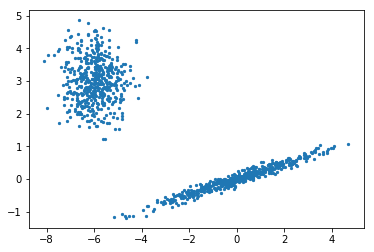

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
%matplotlib inline

n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2,
         ]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()

### 클러스터링
- 각각의 데이터에 대해 responsibility을 알게되면 responsibility가 가장 큰 카테고리를 찾아내어 그 데이터가 어떤 카테고리에 속하는지를 알 수 있다. 즉 클러스터링을 할 수 있다.

`ki=argmaxγik`
 
- 사실 K-means clustering은 EM 방법의 특수한 경우라고 볼 수 있다.

In [3]:
model = GaussianMixture(n_components=2, init_params='random', random_state=0)
model.fit(X)

GaussianMixture(covariance_type='full', init_params='random', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [4]:
gamma = model.predict_proba(X)
gamma = np.hstack([gamma, np.zeros((1000, 1))])
gamma[:5]

array([[ 0.50831878,  0.49168122,  0.        ],
       [ 0.59560354,  0.40439646,  0.        ],
       [ 0.49965018,  0.50034982,  0.        ],
       [ 0.49947851,  0.50052149,  0.        ],
       [ 0.51106489,  0.48893511,  0.        ]])

In [5]:
X

array([[ 0.68026725, -0.01634235],
       [ 3.80951844,  0.79848348],
       [-1.6613724 , -0.57766695],
       ..., 
       [-5.86152028,  3.06842556],
       [-5.01893361,  3.11090369],
       [-6.79933099,  2.08232074]])

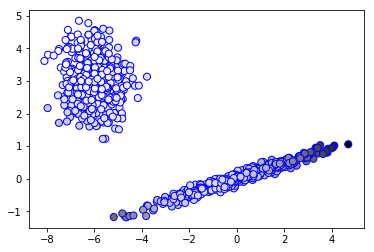

In [6]:
plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
plt.show()

In [7]:
def plot_gaussianmixture(n, k=10):
    model = GaussianMixture(n_components=2, init_params='random', random_state=1, tol=1e-9, max_iter=n)
    model.fit(X)
    gamma = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
    plt.show()
    return model

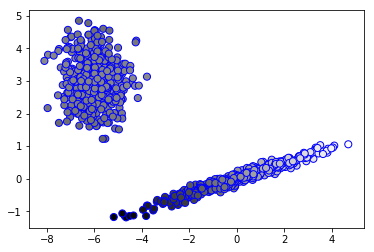

GaussianMixture(covariance_type='full', init_params='random', max_iter=5,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=1, reg_covar=1e-06, tol=1e-09, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [8]:
plot_gaussianmixture(5)

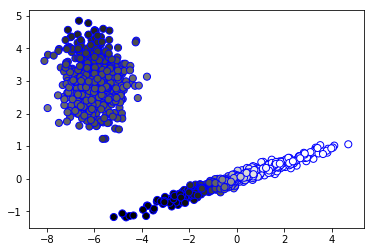

GaussianMixture(covariance_type='full', init_params='random', max_iter=10,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=1, reg_covar=1e-06, tol=1e-09, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [9]:
plot_gaussianmixture(10)

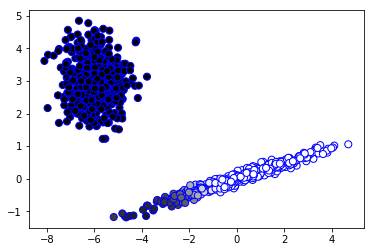

GaussianMixture(covariance_type='full', init_params='random', max_iter=15,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=1, reg_covar=1e-06, tol=1e-09, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [10]:
plot_gaussianmixture(15)

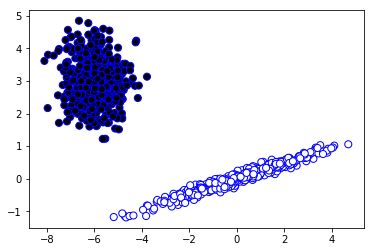

GaussianMixture(covariance_type='full', init_params='random', max_iter=20,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=1, reg_covar=1e-06, tol=1e-09, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
plot_gaussianmixture(20)